<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Sommaire
        </h1>
    </div>
</div>

- **[Preparation du dataset](#pre)**

- **[Verification des annotations](#ve)**

- **[Yolor entrainement](#en)**

- **[Resultat](#re)**

- **[Test du modele](#te)**





In [1]:
!git clone https://github.com/roboflow-ai/yolor

Cloning into 'yolor'...
remote: Enumerating objects: 387, done.
remote: Total 387 (delta 0), reused 0 (delta 0), pack-reused 387
Receiving objects: 100% (387/387), 2.97 MiB | 3.99 MiB/s, done.
Resolving deltas: 100% (173/173), done.


In [9]:
cd /content/yolor/

/content/yolor


In [10]:
!pwd

/content/yolor


To setup our development environment, we will first clone the base YOLOR repository and download the necessary requirements:

In [11]:
!git reset --hard eb3ef0b7472413d6740f5cde39beb1a2f5b8b5d1

HEAD is now at eb3ef0b indentation


In [12]:
!pip install -qr requirements.txt

     |████████████████████████████████| 596 kB 14.6 MB/s 
     |████████████████████████████████| 776.7 MB 4.2 kB/s 
     |████████████████████████████████| 12.7 MB 35.2 MB/s 
     |████████████████████████████████| 1.5 MB 71.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.7.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.7.0 which is incompatible.


In [13]:
# Install Mish CUDA
!git clone https://github.com/JunnYu/mish-cuda

Cloning into 'mish-cuda'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 11.60 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [14]:
cd mish-cuda

/content/yolor/mish-cuda


In [15]:
!git reset --hard 6f38976064cbcc4782f4212d7c0c5f6dd5e315a8

HEAD is now at 6f38976 Update README.md


In [ ]:
!python setup.py build install

In [17]:
cd ..

/content/yolor


In [18]:
# Install PyTorch Wavelets
!git clone https://github.com/fbcotter/pytorch_wavelets

Cloning into 'pytorch_wavelets'...
remote: Enumerating objects: 972, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 972 (delta 75), reused 89 (delta 45), pack-reused 836
Receiving objects: 100% (972/972), 6.80 MiB | 3.42 MiB/s, done.
Resolving deltas: 100% (659/659), done.


In [19]:
cd pytorch_wavelets

/content/yolor/pytorch_wavelets


In [21]:
!pip install .

Processing /content/yolor/pytorch_wavelets
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pytorch-wavelets: filename=pytorch_wavelets-1.3.0-py3-none-any.whl size=54869 sha256=ceacf663170278e953c6a69f30afb6921e5d08fb513caedb9d5dfc92de4b0d14
  Stored in directory: /tmp/pip-ephem-wheel-cache-e_j7gv03/wheels/68/d6/0a/629cb6c68e1577155ab73a47758996d9ab26f15ba622561e28
Successfully built pytorch-wavelets


In [26]:
cd ..

/content


In [24]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [27]:
!mkdir Road_Sign_Dataset

In [28]:
!pwd

/content


<a name='pre'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Preparation du datatset
        </h1>
    </div>
</div>

In [30]:
cd Road_Sign_Dataset

/content/Road_Sign_Dataset


In [31]:
!pwd

/content/Road_Sign_Dataset


In [ ]:
# cd /media/ismail/Elements/formation/projet7/feux/RoadSignDetectionDataset

/media/ismail/Elements/formation/projet7/feux/RoadSignDetectionDataset


In [ ]:
#  !rm -rf /content/annotations/

In [32]:
!wget -O RoadSignDetectionDataset.zip https://arcraftimages.s3-accelerate.amazonaws.com/Datasets/RoadSigns/RoadSignsPascalVOC.zip?region=us-east-2

--2022-05-03 09:46:49--  https://arcraftimages.s3-accelerate.amazonaws.com/Datasets/RoadSigns/RoadSignsPascalVOC.zip?region=us-east-2
Resolving arcraftimages.s3-accelerate.amazonaws.com (arcraftimages.s3-accelerate.amazonaws.com)... 52.222.142.236
Connecting to arcraftimages.s3-accelerate.amazonaws.com (arcraftimages.s3-accelerate.amazonaws.com)|52.222.142.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229344361 (219M) [application/zip]
Saving to: ‘RoadSignDetectionDataset.zip’

RoadSignDetectionDa 100%[===================>] 218.72M  52.2MB/s    in 4.9s    

2022-05-03 09:46:54 (44.6 MB/s) - ‘RoadSignDetectionDataset.zip’ saved [229344361/229344361]



In [ ]:
!unzip RoadSignDetectionDataset.zip

In [34]:
rm -rf __MACOSX RoadSignDetectionDataset.zip

In [35]:
cat annotations/road4.xml


<annotation>
    <folder>images</folder>
    <filename>road4.png</filename>
    <size>
        <width>267</width>
        <height>400</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>trafficlight</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>20</xmin>
            <ymin>109</ymin>
            <xmax>81</xmax>
            <ymax>237</ymax>
        </bndbox>
    </object>
    <object>
        <name>trafficlight</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>116</xmin>
            <ymin>162</ymin>
            <xmax>163</xmax>
            <ymax>272</ymax>
        </bndbox>
    </object>
    <object>
        <name>trafficlight</name>
        <pose>Unspecified</pose>
        <truncated>0</trunca

In [36]:
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [37]:
print(extract_info_from_xml('annotations/road4.xml'))

{'bboxes': [{'class': 'trafficlight', 'xmin': 20, 'ymin': 109, 'xmax': 81, 'ymax': 237}, {'class': 'trafficlight', 'xmin': 116, 'ymin': 162, 'xmax': 163, 'ymax': 272}, {'class': 'trafficlight', 'xmin': 189, 'ymin': 189, 'xmax': 233, 'ymax': 295}], 'filename': 'road4.png', 'image_size': (267, 400, 3)}


In [38]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"trafficlight": 0,
                           "stop": 1,
                           "speedlimit": 2,
                           "crosswalk": 3}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("annotations", info_dict["filename"].replace("png", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [39]:
# Get the annotations
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

100%|██████████| 877/877 [00:00<00:00, 7649.49it/s]


<a name='ve'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Verification des annotations
        </h1>
    </div>
</div>

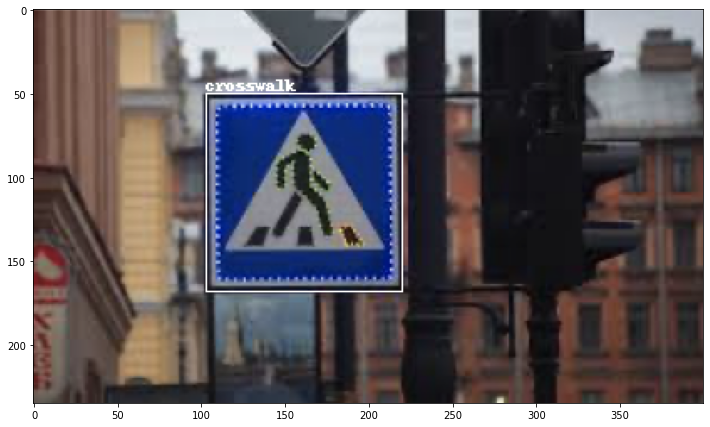

In [40]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "png")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

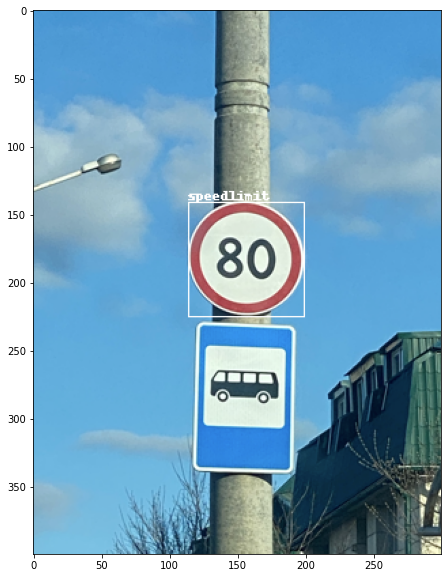

In [41]:
random.seed(20)
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "png")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

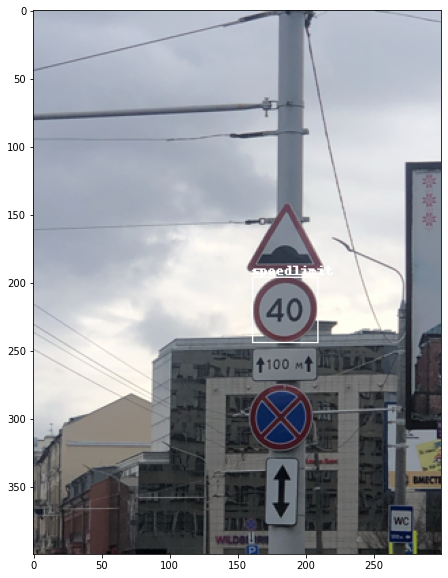

In [42]:
random.seed(100)
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "png")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [43]:
# Read images and annotations
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [44]:
!mkdir images/train images/val images/test annotations/train annotations/val annotations/test

In [45]:
!pwd

/content/Road_Sign_Dataset


In [47]:
!rm -rf -d annotations/*.xml

In [48]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')

In [49]:
!mv annotations labels

In [69]:
cd /content/yolor/ 

/content/yolor


In [72]:
!pwd

/content/yolor


In [ ]:
!pip install -r requirements.txt

In [54]:
from google.colab import drive
drive.mount('/content/ShardDrives/', force_remount=True)

Mounted at /content/ShardDrives/


In [55]:
!cp -avr /content/ShardDrives/MyDrive/roadsign/road_sign_data.yaml /content/yolor/data/road_sign_data.yaml

'/content/ShardDrives/MyDrive/roadsign/road_sign_data.yaml' -> '/content/yolor/data/road_sign_data.yaml'


In [112]:
!cp -avr  /content/ShardDrives/MyDrive/roadsign/road_sign_data.names /content/yolor/data/road_sign_data.names 

'/content/yolor/data/road_sign_data.names' -> '/content/ShardDrives/MyDrive/roadsign/road_sign_data.names'


In [81]:
!cp -avr  /content/ShardDrives/MyDrive/roadsign/yolor/plots.py /content/yolor/utils/plots.py

'/content/ShardDrives/MyDrive/roadsign/yolor/plots.py' -> '/content/yolor/utils/plots.py'


In [82]:
!rm -rf /content/yolor/runs/train

In [162]:
!python train.py --help

usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE]
                [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect]
                [--resume [RESUME]] [--nosave] [--notest] [--noautoanchor]
                [--evolve] [--bucket BUCKET] [--cache-images]
                [--image-weights] [--device DEVICE] [--multi-scale]
                [--single-cls] [--adam] [--sync-bn] [--local_rank LOCAL_RANK]
                [--log-imgs LOG_IMGS] [--workers WORKERS] [--project PROJECT]
                [--name NAME] [--exist-ok]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     initial weights path
  --cfg CFG             model.yaml path
  --data DATA           data.yaml path
  --hyp HYP             hyperparameters path
  --epochs EPOCHS
  --batch-size BATCH_SIZE
                        total batch size for all GPUs
  --img-size IMG_SIZE [IMG_SIZE ...]
              

<a name='en'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Yolor entrainement
        </h1>
    </div>
</div>

In [164]:
# !python train.py --batch-size 16 --img 416 416 --data '/content/yolor/data/road_sign_data.yaml' --cfg cfg/yolor_p6.cfg --weights '/content/yolor/yolor_p6.pt' --device 0 --name yolor_p6 --hyp '/content/yolor/data/hyp.scratch.1280.yaml' --epochs 50

!python train.py --batch-size 16 --img 448 448 --data '/content/yolor/data/road_sign_data.yaml' --cfg cfg/yolor_p6.cfg --weights '/content/yolor/yolor_p6.pt' --device 0 --name yolor_p6 --hyp '/content/yolor/data/hyp.scratch.640.yaml' --epochs 50

Using torch 1.7.0 CUDA:0 (Tesla V100-SXM2-16GB, 16160MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolor_p6.cfg', data='/content/yolor/data/road_sign_data.yaml', device='0', epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='/content/yolor/data/hyp.scratch.640.yaml', image_weights=False, img_size=[448, 448], local_rank=-1, log_imgs=16, multi_scale=False, name='yolor_p6', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/yolor_p63', single_cls=False, sync_bn=False, total_batch_size=16, weights='/content/yolor/yolor_p6.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
NumExpr defaulting to 8 threads.
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.3, 'cls_pw': 1.0, 'obj': 0.7, 'obj_

In [101]:
!pwd

/content/yolor


<a name='re'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Resultat
        </h1>
    </div>
</div>

In [171]:
!python test.py --names '/content/yolor/data/road_sign_data.names' --data '/content/yolor/data/road_sign_data.yaml' --img 448 --batch 32 --conf 0.001 --iou 0.65 --device 0 --weights runs/train/yolor_p6/weights/best.pt --name test --verbose

Namespace(augment=False, batch_size=32, cfg='cfg/yolor_p6.cfg', conf_thres=0.001, data='/content/yolor/data/road_sign_data.yaml', device='0', exist_ok=False, img_size=448, iou_thres=0.65, name='test', names='/content/yolor/data/road_sign_data.names', project='runs/test', save_conf=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=True, weights=['runs/train/yolor_p6/weights/best.pt'])
Using torch 1.7.0 CUDA:0 (Tesla V100-SXM2-16GB, 16160MB)

Model Summary: 665 layers, 37265016 parameters, 37265016 gradients, 81.564040600 GFLOPS
Scanning labels /content/Road_Sign_Dataset/labels/val.cache3 (88 found, 0 missing, 0 empty, 0 duplicate, for 88 images): 88it [00:00, 13944.57it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 3/3 [00:02<00:00,  1.25it/s]
                 all          88         132       0.795       0.937       0.945       0.803
        trafficlight          88          19        0.69       0.895  

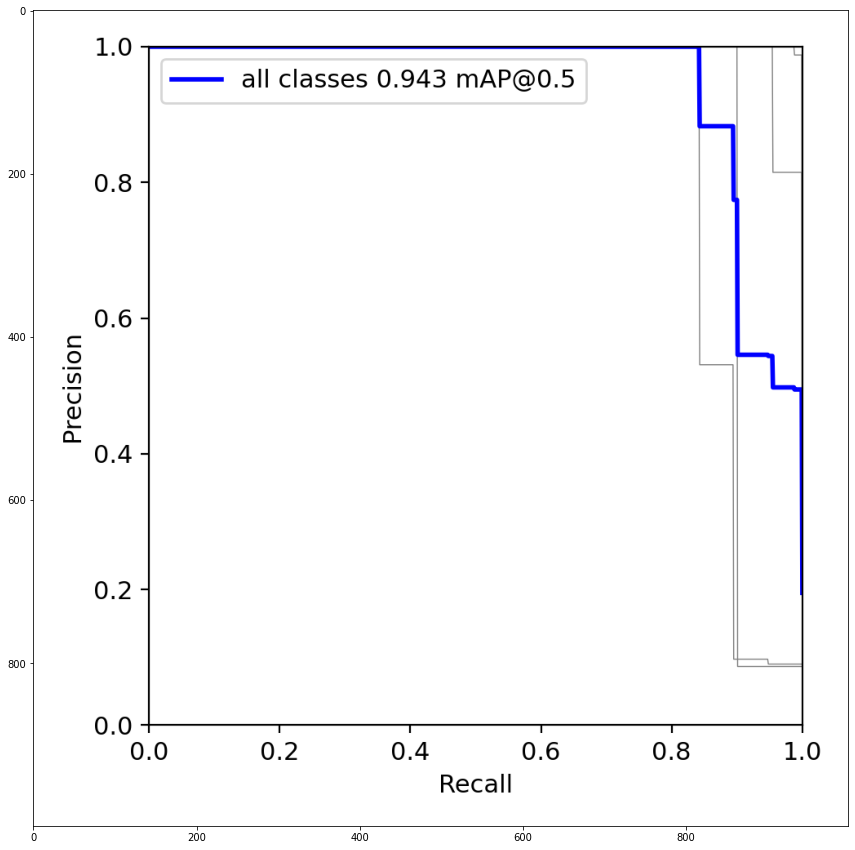

In [115]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.array(Image.open("/content/yolor/runs/train/yolor_p6/precision-recall_curve.png")))

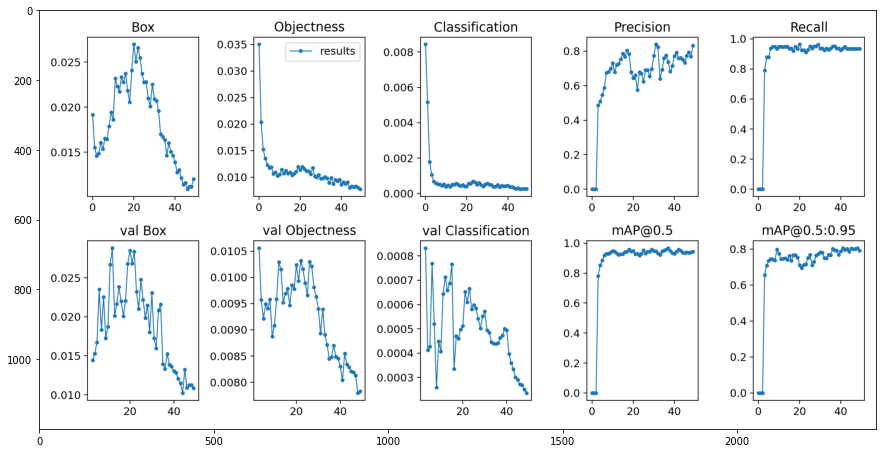

In [113]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.array(Image.open("/content/yolor/runs/train/yolor_p6/results.png")))

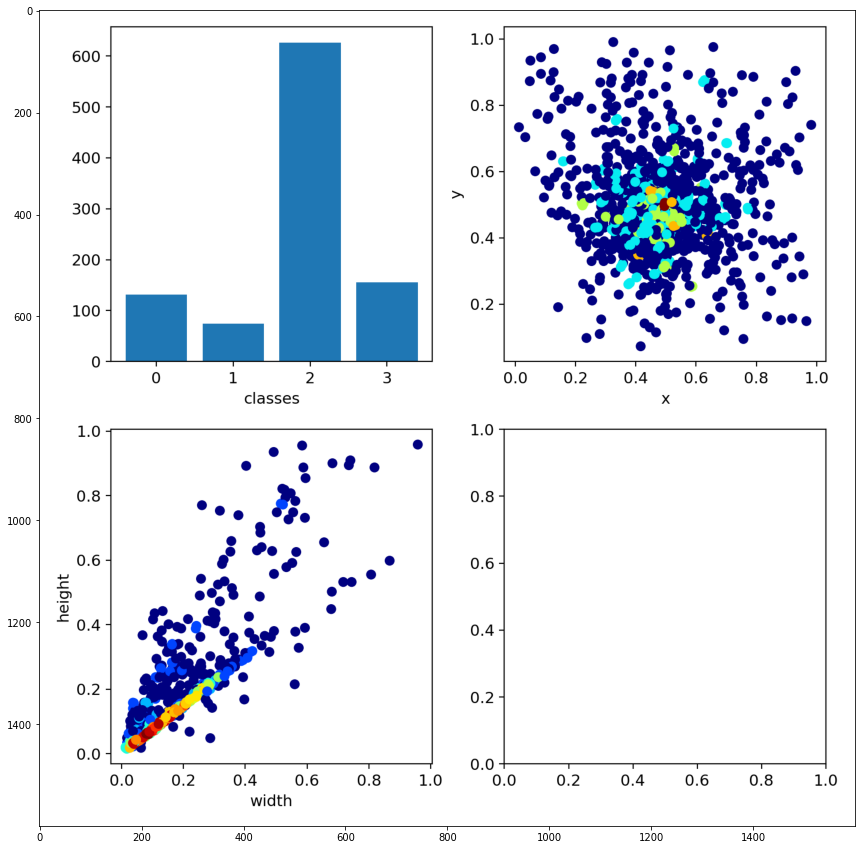

In [114]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.array(Image.open("/content/yolor/runs/train/yolor_p6/labels.png")))

In [128]:
import pandas as pd

results = pd.read_csv("/content/yolor/runs/train/yolor_p6/results.txt",delim_whitespace=True)
results


0/49  4.42G  0.01914   0.03503  0.008433   0.0626  21  448       0  \
0    1/49  4.72G  0.01553  0.020390  0.005161  0.04108  39  448  0.0000   
1    2/49  4.72G  0.01458  0.015240  0.001782  0.03159  33  448  0.0000   
2    3/49  4.72G  0.01487  0.013540  0.001050  0.02947  21  448  0.4865   
3    4/49   4.7G  0.01606  0.012250  0.000686  0.02899  16  448  0.5077   
4    5/49   4.7G  0.01535  0.011750  0.000573  0.02766  27  448  0.5473   
5    6/49   4.7G  0.01651  0.011860  0.000522  0.02890  22  448  0.5873   
6    7/49   4.7G  0.01645  0.010630  0.000491  0.02757  23  448  0.6740   
7    8/49   4.7G  0.01788  0.010900  0.000436  0.02921  23  448  0.6795   
8    9/49   4.7G  0.01941  0.010260  0.000521  0.03019  28  448  0.6980   
9   10/49   4.7G  0.01860  0.010500  0.000372  0.02947  22  448  0.7300   
10  11/49   4.7G  0.02319  0.011390  0.000460  0.03504  36  448  0.6774   
11  12/49   4.7G  0.02228  0.010690  0.000387  0.03336  27  448  0.7214   
12  13/49   4.7G  0.02171  0.011200  0.000502  0.03341  36  448  0.7267   
13  14/49   4.7G  0.02332  0.010690  0.000500  0.03451  34  448  0.7534   
14  15/49   4.7G  0.02274  0.010910  0.000558  0.03421  29  448  0.7857   
15  16/49   4.7G  0.02373  0.010380  0.000489  0.03460  25  448  0.7682   
16  17/49   4.7G  0.02182  0.010600  0.000416  0.03284  27  448  0.8047   
17  18/49   4.7G  0.02054  0.011010  0.000478  0.03203  27  448  0.7837   
18  19/49   4.7G  0.02406  0.011950  0.000403  0.03641  32  448  0.6774   
19  20/49   4.7G  0.02696  0.011360  0.000402  0.03873  29  448  0.6447   
20  21/49   4.7G  0.02504  0.011940  0.000553  0.03754  26  448  0.6593   
21  22/49   4.7G  0.02659  0.011550  0.000556  0.03870  24  448  0.5742   
22  23/49   4.7G  0.02548  0.011160  0.000673  0.03732  23  448  0.6789   
23  24/49   4.7G  0.02371  0.011090  0.000635  0.03543  25  448  0.6693   
24  25/49   4.7G  0.02274  0.010590  0.000491  0.03382  21  448  0.6231   
25  26/49   4.7G  0.02280  0.011720  0.000607  0.03513  26  448  0.6904   
26  27/49   4.7G  0.02096  0.010160  0.000474  0.03160  26  448  0.6911   
27  28/49   4.7G  0.02007  0.009978  0.000403  0.03045  24  448  0.6534   
28  29/49   4.7G  0.02254  0.010450  0.000519  0.03351  31  448  0.6958   
29  30/49   4.7G  0.02088  0.009694  0.000560  0.03113  25  448  0.7735   
30  31/49   4.7G  0.02071  0.009779  0.000509  0.03100  27  448  0.8393   
31  32/49   4.7G  0.01959  0.010030  0.000480  0.03010  21  448  0.8249   
32  33/49   4.7G  0.01699  0.009744  0.000382  0.02712  22  448  0.6408   
33  34/49   4.7G  0.01672  0.008886  0.000378  0.02599  29  448  0.6925   
34  35/49   4.7G  0.01638  0.009842  0.000481  0.02670  23  448  0.7586   
35  36/49   4.7G  0.01462  0.008734  0.000366  0.02372  20  448  0.7750   
36  37/49   4.7G  0.01602  0.009491  0.000447  0.02595  26  448  0.7368   
37  38/49   4.7G  0.01506  0.009262  0.000399  0.02472  27  448  0.6814   
38  39/49   4.7G  0.01462  0.009529  0.000430  0.02458  24  448  0.7145   
39  40/49   4.7G  0.01390  0.008619  0.000438  0.02296  24  448  0.7719   
40  41/49   4.7G  0.01278  0.009025  0.000359  0.02217  31  448  0.7924   
41  42/49   4.7G  0.01305  0.008695  0.000362  0.02211  22  448  0.7595   
42  43/49   4.7G  0.01215  0.009077  0.000320  0.02155  17  448  0.7609   
43  44/49   4.7G  0.01140  0.007991  0.000260  0.01965  32  448  0.7506   
44  45/49   4.7G  0.01160  0.008265  0.000307  0.02017  26  448  0.7321   
45  46/49   4.7G  0.01089  0.008119  0.000237  0.01925  35  448  0.7734   
46  47/49   4.7G  0.01116  0.008247  0.000269  0.01967  29  448  0.7939   
47  48/49   4.7G  0.01119  0.008017  0.000267  0.01948  21  448  0.7690   
48  49/49   4.7G  0.01203  0.007712  0.000269  0.02001  24  448  0.8324   

       0.1     0.2     0.3      0.4       0.5       0.6  
0   0.0000  0.0000  0.0000  0.00000  0.000000  0.000000  
1   0.0000  0.0000  0.0000  0.00000  0.000000  0.000000  
2   0.7907  0.7803  0.6562  0.01445  0.010560  0.000832  
3   0.8792  0.8535  0.

<a name='te'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Test du modele
        </h1>
    </div>
</div>

In [173]:
!python detect.py --device 0 --conf 0.50  --names '/content/yolor/data/road_sign_data.names' --source /content/Road_Sign_Dataset/images/test/ --weights runs/train/yolor_p6/weights/best.pt  

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.5, device='0', img_size=1280, iou_thres=0.5, names='/content/yolor/data/road_sign_data.names', output='inference/output', save_txt=False, source='/content/Road_Sign_Dataset/images/test/', update=False, view_img=False, weights=['runs/train/yolor_p6/weights/best.pt'])
image 1/88 /content/Road_Sign_Dataset/images/test/road100.png: 1280x1280 Done. (0.021s)
image 2/88 /content/Road_Sign_Dataset/images/test/road113.png: 896x1280 Done. (0.024s)
image 3/88 /content/Road_Sign_Dataset/images/test/road129.png: 896x1280 1 crosswalks, Done. (0.024s)
image 4/88 /content/Road_Sign_Dataset/images/test/road140.png: 896x1280 1 crosswalks, Done. (0.023s)
image 5/88 /content/Road_Sign_Dataset/images/test/road142.png: 1280x896 1 crosswalks, Done. (0.025s)
image 6/88 /content/Road_Sign_Dataset/images/test/road143.png: 1280x896 1 crosswalks, Done. (0.025s)
image 7/88 /content/Road_Sign_Dataset/images/test/road157.

In [ ]:
# !rm -rf /content/yolov5/runs/train/yolo_road_det

In [ ]:
# !rm -rf /content/yolov5/runs/detect/road_sign

In [174]:
def show_images_from_directory(path, num_sample):
    fig = plt.figure(figsize=(30,50))
    fig.patch.set_facecolor('#377AB7')
    images = os.listdir(path + "/" )[:num_sample]
    for i in range(num_sample):
        img = imgmp.imread(path+"/"+images[i])
        plt.subplot(num_sample/num_sample+1, num_sample, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show() 

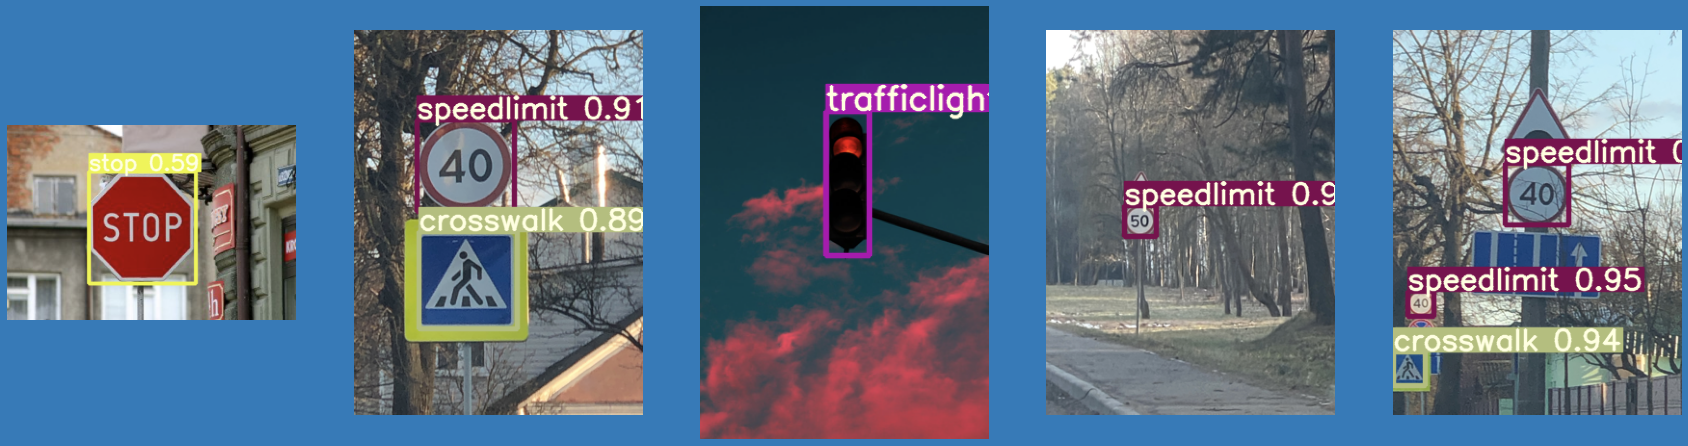

In [175]:
import matplotlib.image as imgmp
sign_list =["trafficlight","stop", "speedlimit","crosswalk"]
show_images_from_directory("/content/yolor/inference/output", 5)

In [176]:
import os
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt
detections_dir = "/content/yolor/inference/output"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]


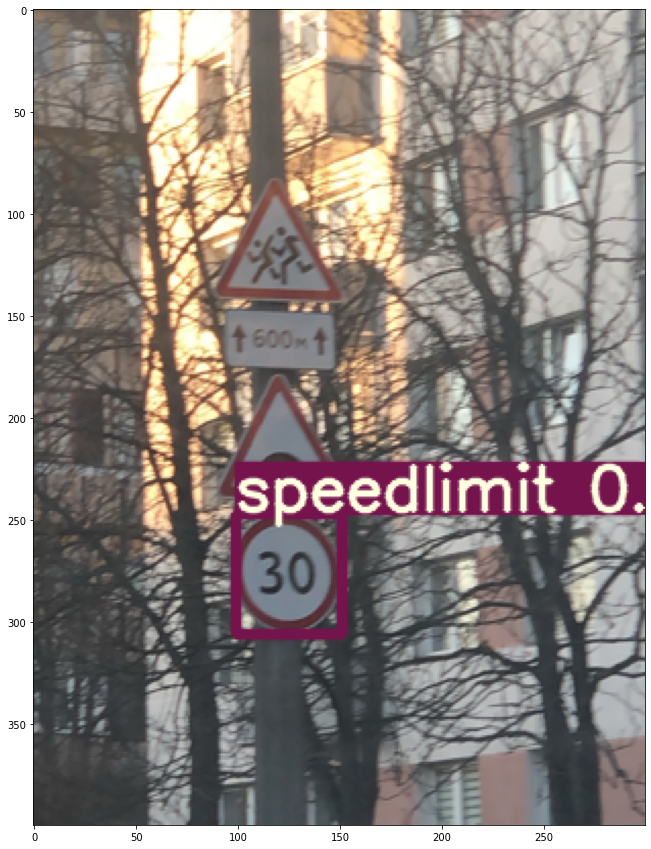

In [177]:
plt.figure(figsize=(15,15))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

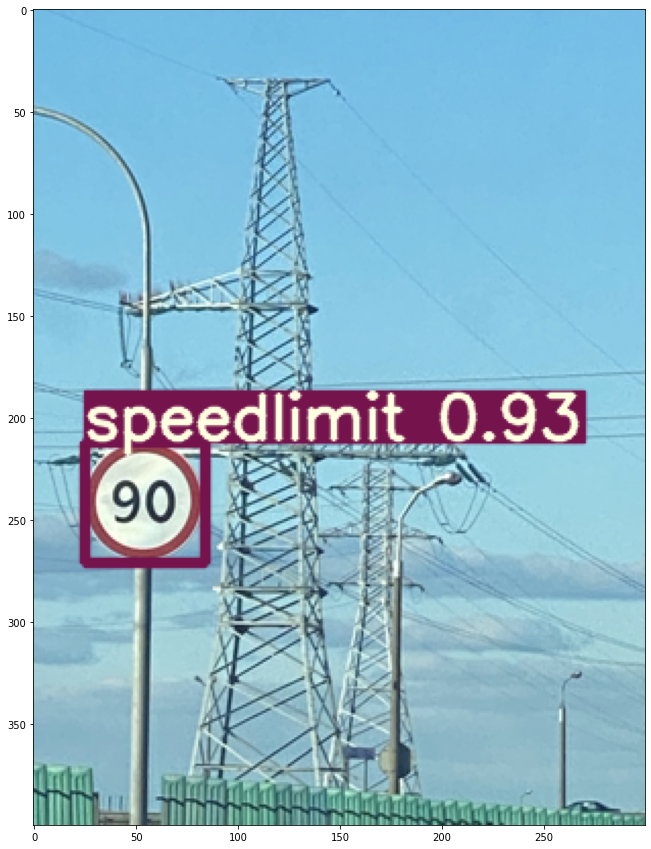

In [179]:
random.seed(15)
plt.figure(figsize=(15,15))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

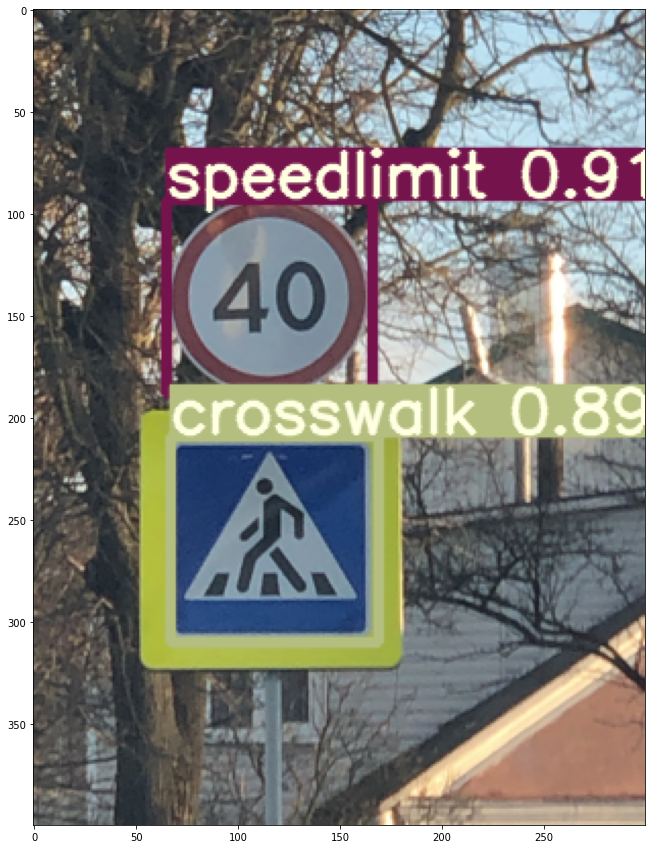

In [180]:
plt.figure(figsize=(15,15))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [184]:
!cp -avr /content/yolor/runs/train/yolor_p6/ /content/ShardDrives/MyDrive/roadsign/results_yolor_p6

'/content/yolor/runs/train/yolor_p6/' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6'
'/content/yolor/runs/train/yolor_p6/events.out.tfevents.1651576343.3f0913226cf8.2237.0' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/events.out.tfevents.1651576343.3f0913226cf8.2237.0'
'/content/yolor/runs/train/yolor_p6/weights' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights'
'/content/yolor/runs/train/yolor_p6/weights/init.pt' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights/init.pt'
'/content/yolor/runs/train/yolor_p6/weights/last.pt' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights/last.pt'
'/content/yolor/runs/train/yolor_p6/weights/best.pt' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights/best.pt'
'/content/yolor/runs/train/yolor_p6/weights/best_overall.pt' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights/best_overall.pt'
'/content/yolor/runs/train/yolor_p6/weights/best_p.pt' -> 